In [1]:
import os
os.chdir('/home/fraza0/Desktop/MEI/TESE/nonverbal_communication_analysis')
print("Working Directory:", os.getcwd())
import ipywidgets as widgets
import pandas as pd
from pandas.io.json import json_normalize
import json
from pprint import pprint
import threading
from IPython.display import display
import ipywidgets as widgets
import time
import matplotlib.pyplot as plt
import numpy as np
import cv2
from pathlib import Path
import re
from nonverbal_communication_analysis.environment import OPENFACE_OUTPUT_DIR, OPENPOSE_OUTPUT_DIR, VALID_OUTPUT_FILE_TYPES

Working Directory: /home/fraza0/Desktop/MEI/TESE/nonverbal_communication_analysis


In [16]:
groups_list = os.listdir(OPENPOSE_OUTPUT_DIR)

GROUP_ID = widgets.Dropdown(
    options=groups_list,
    value=groups_list[1],
    description='Group:',
    disabled=False,
)
display(GROUP_ID)

Dropdown(description='Group:', index=1, options=('walking_happy_output.tar.gz', '3CLC9VWRSAMPLE', '3CLC9VWR', …

## Openpose

In [18]:
GROUP_DIR = OPENPOSE_OUTPUT_DIR / GROUP_ID.value
PROCESSED_DIR = GROUP_DIR/(GROUP_ID.value+'_processed')

In [219]:
def group_distance_format(frame_idx, intragroup_distance_task, group_data):
    intragroup_distance_metric = group_data['intragroup_distance']
    group_distance_frame = dict()
    group_distance_frame['frame'] = frame_idx
    for camera, attrs in intragroup_distance_metric.items():
        group_distance_frame[camera] = [attrs['area']]
    frame_df = pd.DataFrame(group_distance_frame)
    return frame_df

def group_distance_analysis(intragroup_distance_data):
    fig, ax = plt.subplots(figsize=(16,5))
    
    for key, value in intragroup_distance_data.items():
        if key == 'frame':
            identifier = value
        else:
            plt.plot(value, label=key)
            
    plt.xlim((0, len(intragroup_distance_data)))
    plt.legend()
    plt.show()

Invalid Frame: 0
Invalid Frame: 1
Invalid Frame: 2
min 447.0 max 422.0


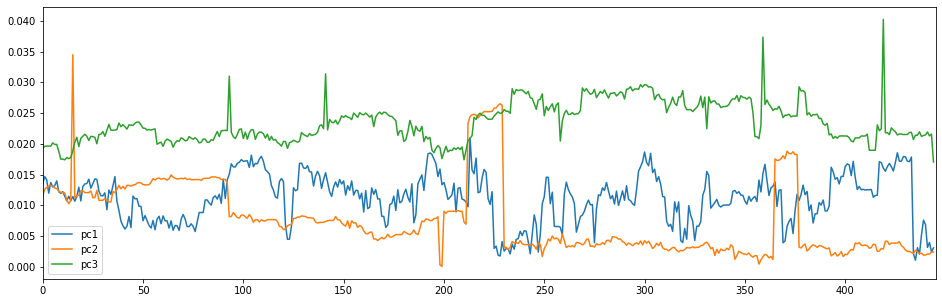

min 434.0 max 215.0


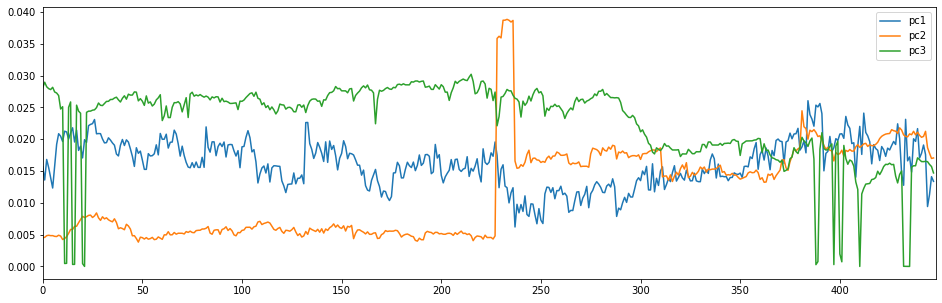

In [220]:
tasks_dirs = [x for x in PROCESSED_DIR.iterdir() if 'task' in x.name]

for task in tasks_dirs[:]:
    metrics_files = [x for x in task.iterdir() if x.suffix in VALID_OUTPUT_FILE_TYPES]
    metrics_files.sort()
    intragroup_distance_task = pd.DataFrame()
    for metrics_file in metrics_files[:]:
        data = json.load(open(metrics_file))
        frame_idx = data['frame']
        if not data['is_valid']:
            print("Invalid Frame:", frame_idx)
            continue
        intragroup_distance_frame = group_distance_format(frame_idx, intragroup_distance_task, data['group'])
        intragroup_distance_task = intragroup_distance_task.append(intragroup_distance_frame, ignore_index=True)
    
    camera = 'pc3'
    print('min', intragroup_distance_task.loc[intragroup_distance_task[camera].idxmin()]['frame'], 'max', intragroup_distance_task.loc[intragroup_distance_task[camera].idxmax()]['frame'])
    group_distance_analysis(intragroup_distance_task)